In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('ggplot')

In [51]:
import matplotlib
matplotlib.__version__

'1.5.3'

In [52]:
y_data = pd.read_csv('responses.csv')
y_data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [53]:
smoking_id = y_data['Smoking'].unique()
alc_id = y_data['Alcohol'].unique()
print smoking_id, '\n', alc_id

['never smoked' 'tried smoking' 'former smoker' 'current smoker' nan] 
['drink a lot' 'social drinker' 'never' nan]


We are going to convert the smoking and alc responses to numerical values. 0 being 'never' and 5 being 'a lot'

In [54]:
life_dict = {'never smoked': 5, 'tried smoking': 4, 'former smoker': 2, 'current smoker': 0,'never': 5, 'social drinker': 3, 'drink a lot': 0}

Convert the smoking and alcohol into numeric, and then put them together

In [55]:
for index, row in y_data.iterrows():
    try:
        val = life_dict[row['Alcohol']] + life_dict[row['Smoking']]
        y_data.loc[index,'Life health'] = val
    except:
        y_data.loc[index,'Life health'] = np.nan
    

In [56]:
t1 = y_data.dropna()

We see that young people who are not worried about their health have a lower health rate

In [57]:
age_finance2 = pd.DataFrame(0, index = xrange(0,4) ,columns = xrange(1,6))

In [58]:
for index, row in y_data.iterrows():
    f_num = row['Finances']
    a_num = row['Age']
    if np.isnan(f_num) or np.isnan(a_num):
        continue
    else:
        f_num = int(f_num)
        a_num = int(a_num)
    age_finance2.loc[math.floor((a_num-15)/4),f_num]+=1

In [59]:
totals2 = age_finance2.sum(axis = 1)
looplist = [(x,y) for x in xrange(0,4) for y in xrange(1,6)]
for x,y in looplist:
        age_finance2.loc[x,y] = float(age_finance2.loc[x,y])/totals2[x]

We can see from this graph that as Age increases, the opinion on saving money also increases.

Lets look at the spending between entertainment, looks, gadgets, and healthy eating. First, a side by side bar plot, then individual plots

In [60]:
spendings = y_data.keys()[136:140]
print spendings

Index([u'Entertainment spending', u'Spending on looks', u'Spending on gadgets',
       u'Spending on healthy eating'],
      dtype='object')


In [61]:
df_spend = pd.DataFrame()
for x in spendings:
    nums = y_data[x].value_counts()
    df_nums = nums.to_frame()
    if df_spend.empty:
        df_spend = nums.to_frame()
    else:
        df_spend = pd.merge(df_spend, df_nums, right_index = True, left_index = True)
    

In [62]:
df_list = list(df_spend)
df_spend2 = pd.DataFrame(0, index = xrange(1,6) ,columns = df_list)
df_total = df_spend.sum(axis = 0)

In [63]:
looplist = [(x,y) for x in xrange(1,6) for y in df_list]

In [64]:
looplist

[(1, 'Entertainment spending'),
 (1, 'Spending on looks'),
 (1, 'Spending on gadgets'),
 (1, 'Spending on healthy eating'),
 (2, 'Entertainment spending'),
 (2, 'Spending on looks'),
 (2, 'Spending on gadgets'),
 (2, 'Spending on healthy eating'),
 (3, 'Entertainment spending'),
 (3, 'Spending on looks'),
 (3, 'Spending on gadgets'),
 (3, 'Spending on healthy eating'),
 (4, 'Entertainment spending'),
 (4, 'Spending on looks'),
 (4, 'Spending on gadgets'),
 (4, 'Spending on healthy eating'),
 (5, 'Entertainment spending'),
 (5, 'Spending on looks'),
 (5, 'Spending on gadgets'),
 (5, 'Spending on healthy eating')]

In [65]:
for x,y in looplist:
        df_spend2.loc[x,y] = float(df_spend.loc[float(x),y])/df_total[y]

In [66]:
df_spend3 = df_spend2.transpose()

<h1> Health Analysis (MATTS PART) </h1>


One of the goals was to convert students lifestyles into qualitative data that could be used for better advertising. When asked to evaluate their own health, the majority of the young people believed that they lived moderately healthy lifestyles (a score of 3 or above). This is an important starting point because the data from Figure 1 visualizes that more than half of the sample felt this way. The next objective was to split the sample into four categories based upon their response about their smoking habits. These four habits were later faceted and the results regarding their personal opinion of their health was plotted again. 

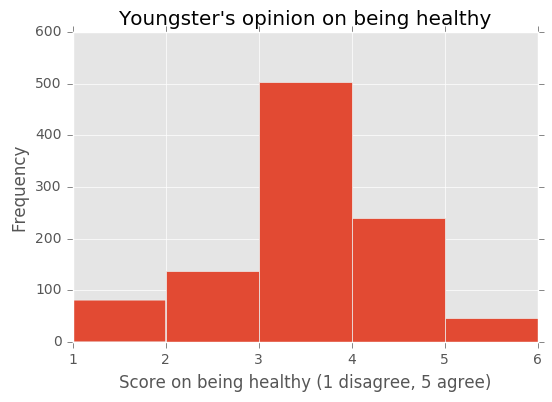

In [67]:
y_data.hist(column='Healthy eating', bins=np.arange(1, 7, 1))
plt.xlabel('Score on being healthy (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s opinion on being healthy')
plt.show()

Surprisingly most of the survey correspondents were not as concerned with health and lifestyle choices and we would have expected. Because more than half off the results had an opinion of ‘3’ or moderate concern over health. This led our group to analyze whether student’s opinion on health and their own personal health scores had any sort of relationship. In the figure below,  the main area of interest were people that were worried about health (scores 3-5) and not worried about health (scores 1-2). It is hypothesized that those that have little concern over health would have worse health. There is some ambiguity in the overall results of this test, but it looks like those that did not worry about health tended to have lower health.  

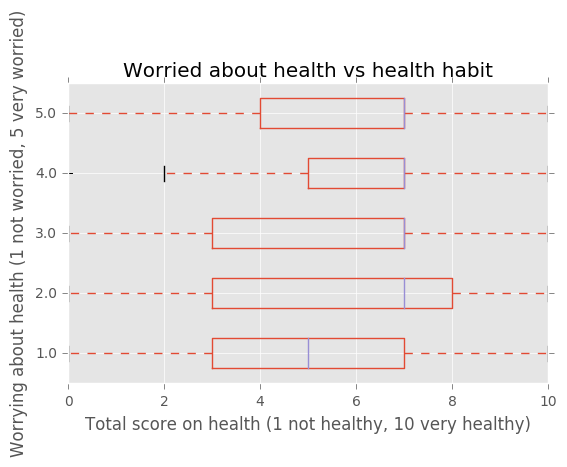

In [68]:
t1.boxplot(column='Life health', by='Health', vert=False)
plt.xlabel('Total score on health (1 not healthy, 10 very healthy)')
plt.ylabel('Worrying about health (1 not worried, 5 very worried)')
plt.title('Worried about health vs health habit')
plt.suptitle('')
plt.show()

According to the Center for Disease Control and Prevention, the Tobacco industry spends billions of dollars a year towards marketing and has continued to see a steady rate of cigarette purchases around the globe. The percentage of Slovakian children abusing tobacco is 23.2% for males and 23% for females. This is particularly alarming because this percentage is higher in than the average percentage of children smoking in high-income countries. 



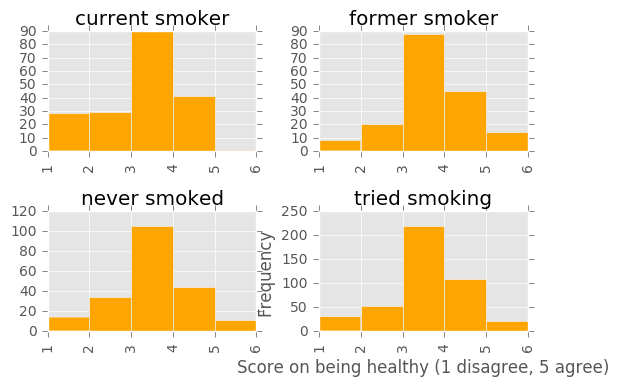

In [69]:
y_data.hist(column='Healthy eating', by='Smoking', color = 'orange', bins=np.arange(1, 7, 1))
plt.ylim((0,250))
plt.xlabel('Score on being healthy (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.show()

The first observation is that the largest group is the one where people said they had tried smoking. And similar to the combined data, all of the groups felt that they had moderate health levels of 3. However, it is important to note that for current smokers, none of them believed that they were very healthy (score of 5). Because the data could be split into two groups of smokers vs non-smokers, further research into the spending habits and personality traits of these groups was needed.

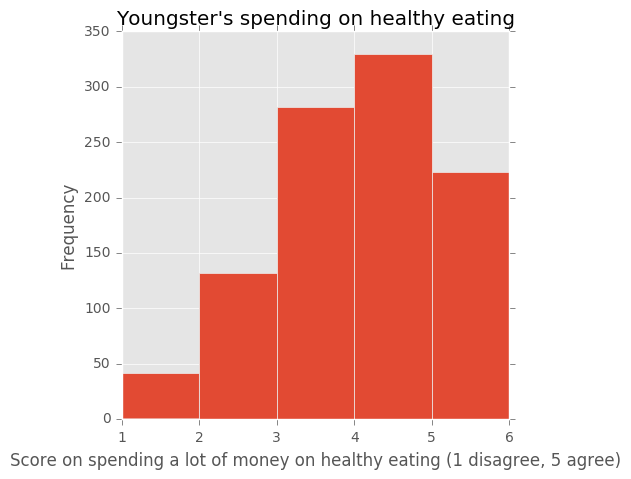

In [70]:
y_data.hist(column='Spending on healthy eating', bins=np.arange(1, 7, 1), figsize = (5,5))
plt.xlabel('Score on spending a lot of money on healthy eating (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s spending on healthy eating')
plt.show()

Young people’s spending habits on food was particularly interesting because food expenses are a major portion of people’s expenses. From the USDA, it was reported that in 2013 around 10% of people’s per capita disposable income was spent on food away from home or food at home. According to the figure above, it appears that this demographic is willing to spend money for healthier foods. Slightly more than 50% of the survey participants indicated they were willing to spend money on healthier types of food. 

In [71]:
health_sport = y_data[y_data['Life health'] > 6][['Passive sport', 'Active sport', 'Adrenaline sports']]
smokers = y_data[y_data['Smoking'].str.contains('smoker', na = False)][['Alcohol', 'Spending on healthy eating', 'Passive sport', 'Active sport']]
health_sport2 = y_data[y_data['Life health'] > 6][['Passive sport','Spending on healthy eating', 'Active sport', 'Adrenaline sports']]

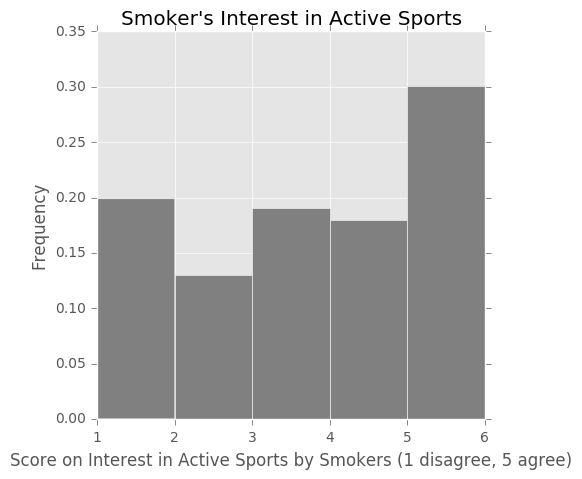

In [72]:
smokers.hist(column='Active sport', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Grey',normed = 1)
plt.xlabel('Score on Interest in Active Sports by Smokers (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Smoker\'s Interest in Active Sports')
plt.show()

From this we see that smoker’s personal interests are in athletic events. Surprisingly, major interest in sports was the response with the highest frequency. Nearly 50% of the respondents indicated an interest level of 4 or 5. This just goes to show that regardless of their personal choices, sports are an important component of their day. 

<h3> Health Interpertation </h3>

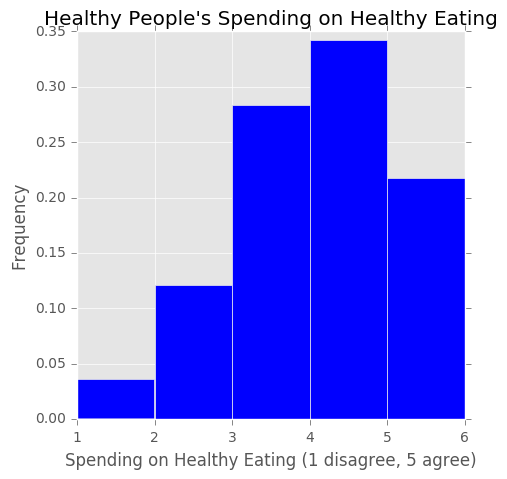

In [73]:
health_sport2.hist(column='Spending on healthy eating', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Blue',normed=1)
plt.xlabel('Spending on Healthy Eating (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Healthy People\'s Spending on Healthy Eating')
plt.show()

Since the target demographic is willing to spend their income on healthier foods, there is a demand for these products. From the figures below, one can see that the willingness to spend on healthy food (scores 4 or 5) are higher for healthy people compared to smoker’s.  

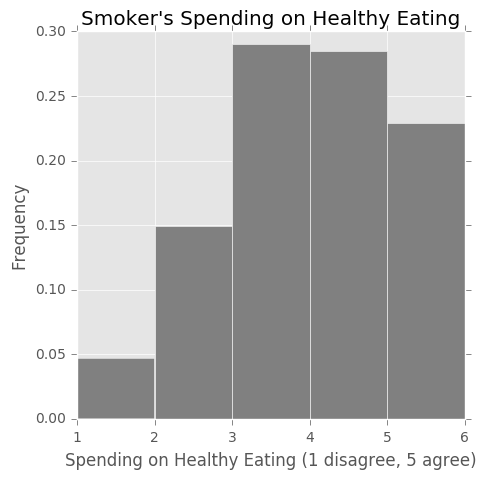

In [74]:
smokers.hist(column='Spending on healthy eating', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Grey',normed = 1)
plt.xlabel('Spending on Healthy Eating (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Smoker\'s Spending on Healthy Eating')
plt.show()

Now with this information, a business can gear advertisements towards this demographic of people. High quality grocery stores such as Whole Food could promote their products n fitness centers or athletic sporting events. This is beneficial since we learned above that the age demographic spends a large portion of their income towards food expenditures. 

While tobacco is a very controversial industry, these businesses can use the cultural information to make better advertising decision. They can spend more money towards advertising in popular Slovakian sports such as Soccer and Ice hockey. The promotion of tobacco through sports may seem counter intuitive, but the widespread cultural popularity of athletic competition may be too profitable to pass on. 

<h1> END OF MY PART EUGENE </h1>

In [42]:
smokers['Alcohol'].value_counts()

social drinker    208
drink a lot       133
never              22
Name: Alcohol, dtype: int64

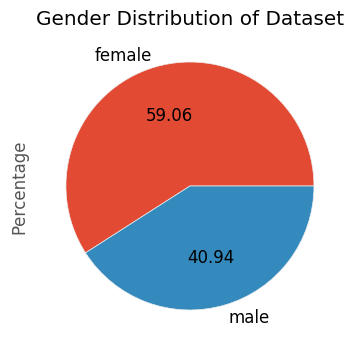

In [43]:
y_data['Gender'].value_counts().plot.pie(labels = ['female','male'], autopct = '%.2f', fontsize = 12, figsize = (4,4))
plt.ylabel('Percentage')
plt.title('Gender Distribution of Dataset')
plt.show()

In [44]:
f_data = y_data[y_data['Gender'] == 'female'][["Friends versus money", "Decision making", "Eating to survive", "Giving", "Charity", "Appearence and gestures", "Finding lost valuables", "Finances", "Shopping centres", "Branded clothing", "Entertainment spending", "Spending on looks", "Spending on gadgets", "Spending on healthy eating"]]
f_data.shape

(593, 14)

In [45]:
m_data = y_data[y_data['Gender'] == 'male'][["Friends versus money", "Decision making", "Eating to survive", "Giving", "Charity", "Appearence and gestures", "Finding lost valuables", "Finances", "Shopping centres", "Branded clothing", "Entertainment spending", "Spending on looks", "Spending on gadgets", "Spending on healthy eating"]]
m_data.shape

(411, 14)

In [46]:
list(m_data)

['Friends versus money',
 'Decision making',
 'Eating to survive',
 'Giving',
 'Charity',
 'Appearence and gestures',
 'Finding lost valuables',
 'Finances',
 'Shopping centres',
 'Branded clothing',
 'Entertainment spending',
 'Spending on looks',
 'Spending on gadgets',
 'Spending on healthy eating']

In [47]:
print m_data.count()

Friends versus money          408
Decision making               409
Eating to survive             411
Giving                        409
Charity                       408
Appearence and gestures       411
Finding lost valuables        409
Finances                      410
Shopping centres              411
Branded clothing              411
Entertainment spending        409
Spending on looks             409
Spending on gadgets           411
Spending on healthy eating    410
dtype: int64


In [48]:
print f_data.count()

Friends versus money          590
Decision making               592
Eating to survive             593
Giving                        589
Charity                       593
Appearence and gestures       590
Finding lost valuables        591
Finances                      591
Shopping centres              591
Branded clothing              591
Entertainment spending        592
Spending on looks             592
Spending on gadgets           593
Spending on healthy eating    592
dtype: int64


In [49]:
study_col = list(f_data)
f_study = pd.DataFrame(0, index = xrange(1,6) ,columns = study_col)
m_study = pd.DataFrame(0, index = xrange(1,6) ,columns = study_col)

In [50]:
for index, row in f_data.iterrows():
    for y in study_col:
        try:
            f_study.loc[row[y],y] += 1
        except:
            continue


In [51]:
for index, row in m_data.iterrows():
    for y in study_col:
        try:
            m_study.loc[row[y],y] += 1
        except:
            continue

In [52]:
f_total = f_study.sum(axis = 0)
m_total = m_study.sum(axis = 0)

In [53]:
def gender_study(df_s, df_t, x , y):
        df_s.loc[x,y] = float(df_s.loc[x,y])/df_t[y]
        return None

In [54]:
[gender_study(f_study, f_total, x,y) for x in xrange(1,6) for y in study_col]
f_study

,Friends versus money,Decision making,Eating to survive,Giving,Charity,Appearence and gestures,Finding lost valuables,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
1,0.033898,0.082770,0.394604,0.134126,0.333895,0.016949,0.143824,0.109983,0.109983,0.201354,0.119932,0.092905,0.215852,0.042230
2,0.059322,0.187500,0.279933,0.168081,0.298482,0.064407,0.164129,0.160745,0.143824,0.172589,0.204392,0.175676,0.310287,0.131757
3,0.262712,0.314189,0.182125,0.285229,0.284992,0.330508,0.362098,0.370558,0.226734,0.306261,0.341216,0.302365,0.244519,0.278716
4,0.274576,0.192568,0.077572,0.191851,0.055649,0.400000,0.187817,0.252115,0.253807,0.199662,0.201014,0.265203,0.134907,0.329392
5,0.369492,0.222973,0.065767,0.220713,0.026981,0.188136,0.142132,0.106599,0.265651,0.120135,0.133446,0.163851,0.094435,0.217905


In [55]:
[gender_study(m_study, m_total, x,y) for x in xrange(1,6) for y in study_col]
m_study

,Friends versus money,Decision making,Eating to survive,Giving,Charity,Appearence and gestures,Finding lost valuables,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
1,0.051471,0.083130,0.304136,0.217604,0.382353,0.029197,0.239609,0.146341,0.160584,0.133820,0.046455,0.134474,0.087591,0.039024
2,0.112745,0.220049,0.291971,0.237164,0.294118,0.114355,0.193154,0.185366,0.216545,0.121655,0.173594,0.246944,0.192214,0.131707
3,0.289216,0.371638,0.194647,0.310513,0.232843,0.355231,0.332518,0.334146,0.262774,0.240876,0.266504,0.288509,0.272506,0.282927
4,0.250000,0.185819,0.155718,0.146699,0.073529,0.343066,0.146699,0.248780,0.211679,0.296837,0.305623,0.215159,0.236010,0.321951
5,0.296569,0.139364,0.053528,0.088020,0.017157,0.158151,0.088020,0.085366,0.148418,0.206813,0.207824,0.114914,0.211679,0.224390


In [56]:
f_study.sum()

Friends versus money          1.0
Decision making               1.0
Eating to survive             1.0
Giving                        1.0
Charity                       1.0
Appearence and gestures       1.0
Finding lost valuables        1.0
Finances                      1.0
Shopping centres              1.0
Branded clothing              1.0
Entertainment spending        1.0
Spending on looks             1.0
Spending on gadgets           1.0
Spending on healthy eating    1.0
dtype: float64

In [57]:
m_study.sum()

Friends versus money          1.0
Decision making               1.0
Eating to survive             1.0
Giving                        1.0
Charity                       1.0
Appearence and gestures       1.0
Finding lost valuables        1.0
Finances                      1.0
Shopping centres              1.0
Branded clothing              1.0
Entertainment spending        1.0
Spending on looks             1.0
Spending on gadgets           1.0
Spending on healthy eating    1.0
dtype: float64

Confirm the data is converted to percentage since all of the data adds up to 1.

In [58]:
bar_width = 0.3
bar_locations = np.arange(1,6)

In [59]:
onefive = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

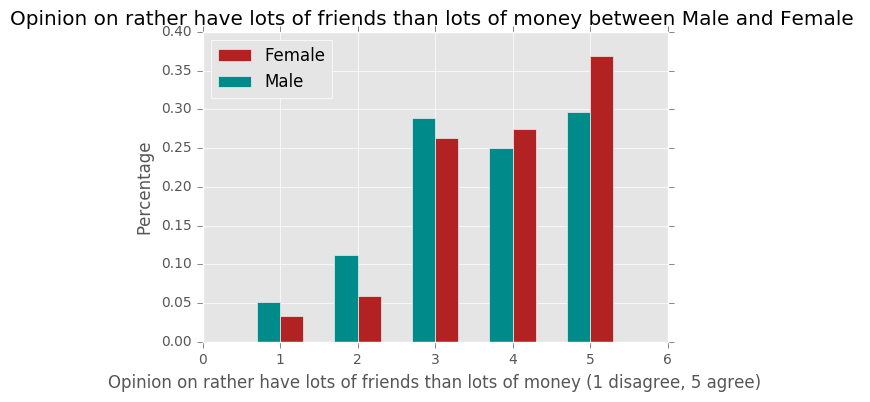

In [60]:
plt.bar(bar_locations, f_study['Friends versus money'], bar_width, color = 'firebrick', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Friends versus money'], bar_width, color='darkcyan', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper left')
plt.xlabel('Opinion on rather have lots of friends than lots of money (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on rather have lots of friends than lots of money between Male and Female ')
plt.show()

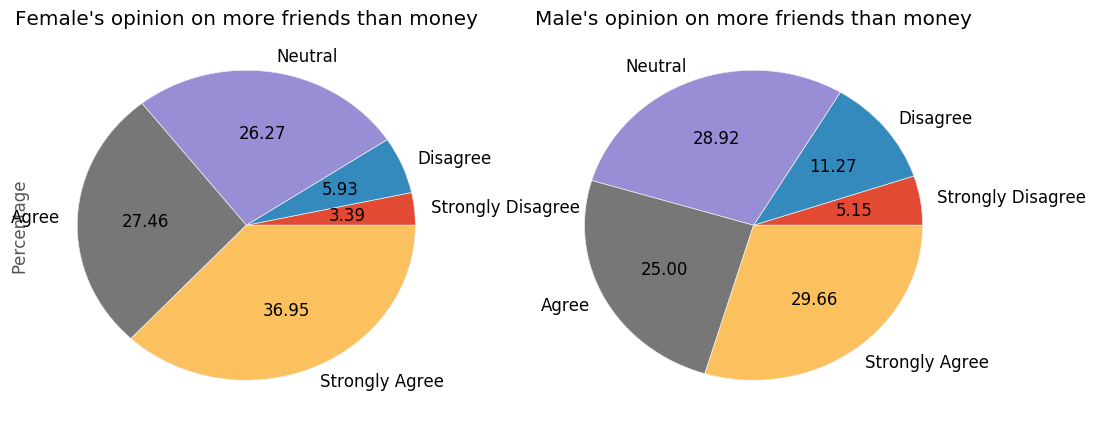

In [61]:
plt.subplot(1,2,1)
f_study['Friends versus money'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on more friends than money')
plt.subplot(1,2,2)
m_study['Friends versus money'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on more friends than money')
plt.show()

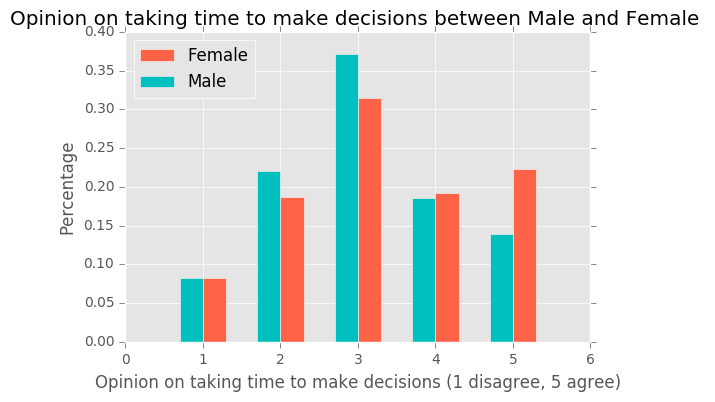

In [62]:
plt.bar(bar_locations, f_study['Decision making'], bar_width, color = 'tomato', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Decision making'], bar_width, color='c', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper left')
plt.xlabel('Opinion on taking time to make decisions (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on taking time to make decisions between Male and Female ')
plt.show()

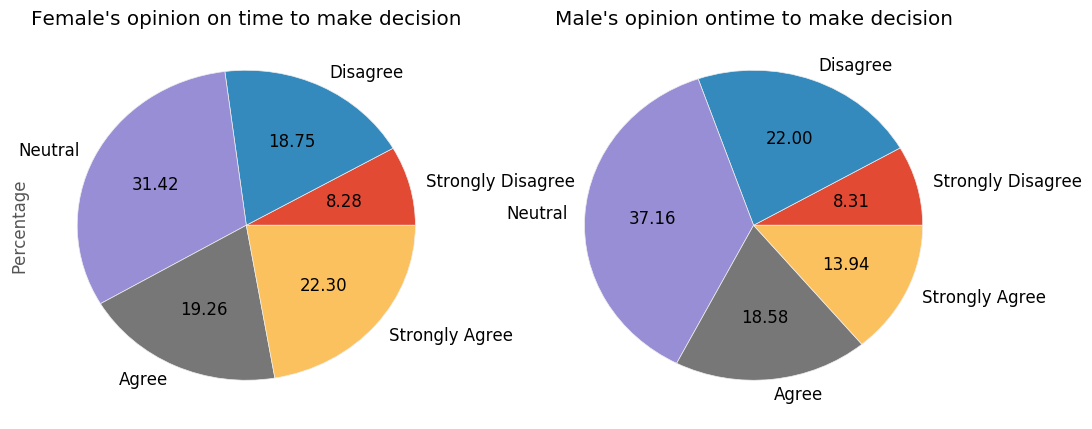

In [63]:
plt.subplot(1,2,1)
f_study['Decision making'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on time to make decision')
plt.subplot(1,2,2)
m_study['Decision making'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion ontime to make decision')
plt.show()

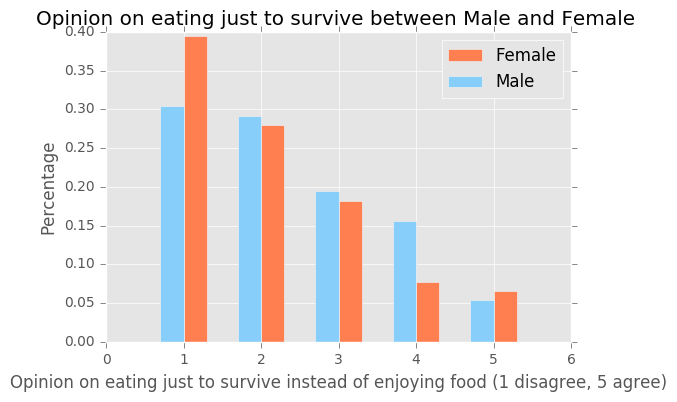

In [64]:
plt.bar(bar_locations, f_study['Eating to survive'], bar_width, color = 'coral', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Eating to survive'], bar_width, color='lightskyblue', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper right')
plt.xlabel('Opinion on eating just to survive instead of enjoying food (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on eating just to survive between Male and Female ')
plt.show()

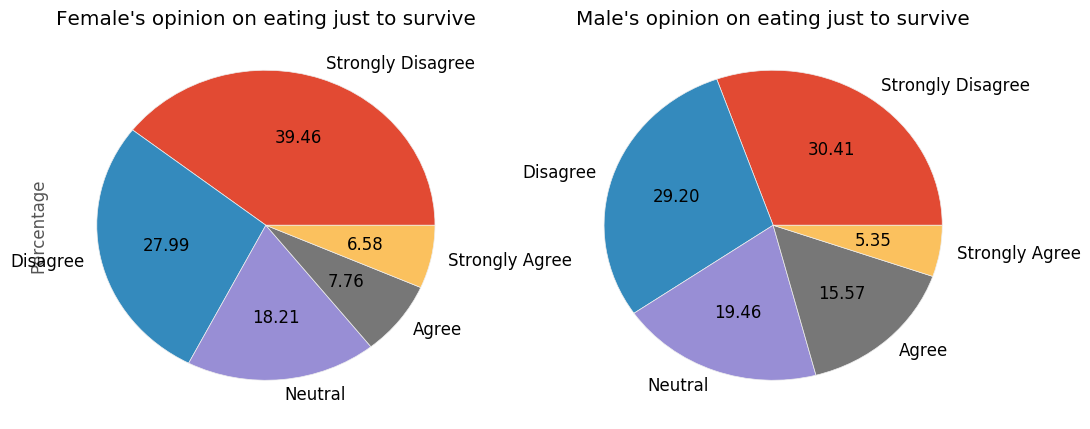

In [65]:
plt.subplot(1,2,1)
f_study['Eating to survive'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on eating just to survive')
plt.subplot(1,2,2)
m_study['Eating to survive'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on eating just to survive')
plt.show()

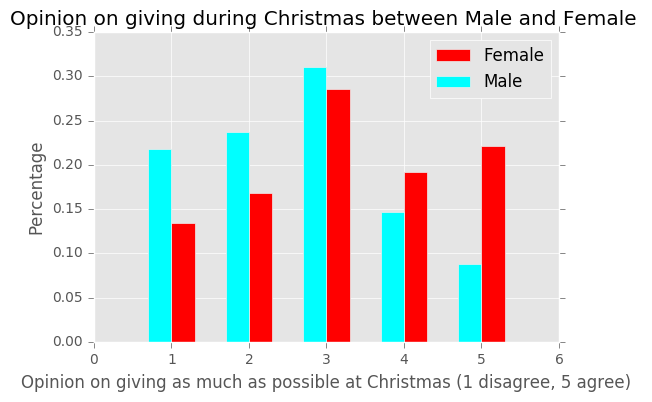

In [66]:
plt.bar(bar_locations, f_study['Giving'], bar_width, color = 'r', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Giving'], bar_width, color='aqua', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper right')
plt.xlabel('Opinion on giving as much as possible at Christmas (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on giving during Christmas between Male and Female ')
plt.show()

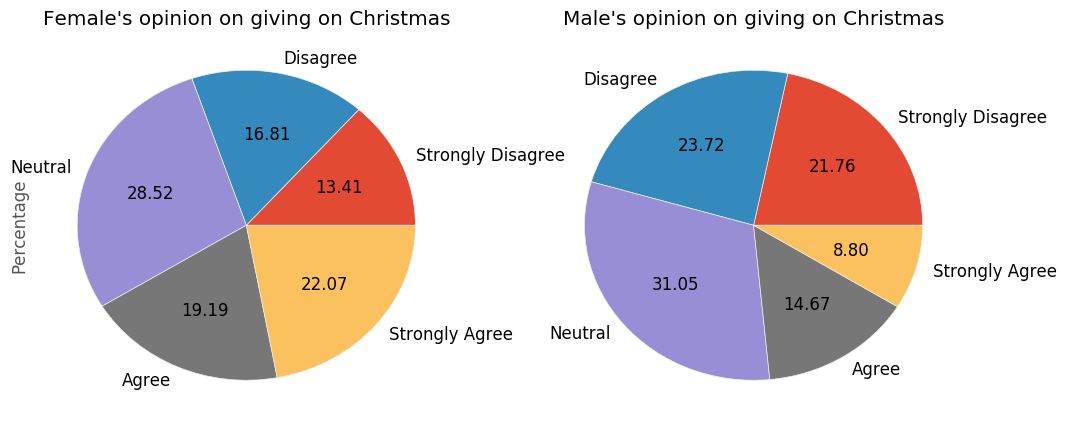

In [67]:
plt.subplot(1,2,1)
f_study['Giving'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on giving on Christmas')
plt.subplot(1,2,2)
m_study['Giving'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on giving on Christmas')
plt.show()

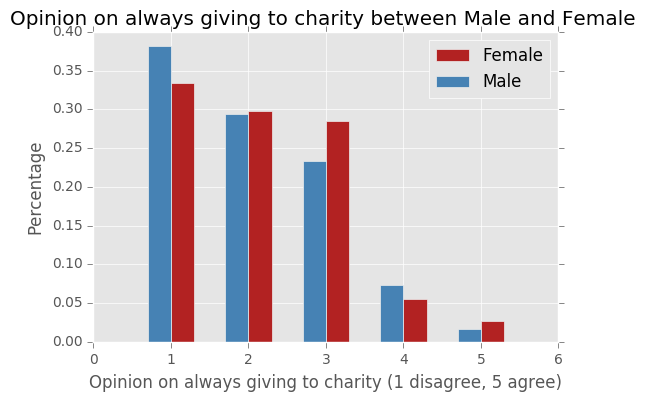

In [68]:
plt.bar(bar_locations, f_study['Charity'], bar_width, color = 'firebrick', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Charity'], bar_width, color='steelblue', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper right')
plt.xlabel('Opinion on always giving to charity (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on always giving to charity between Male and Female ')
plt.show()

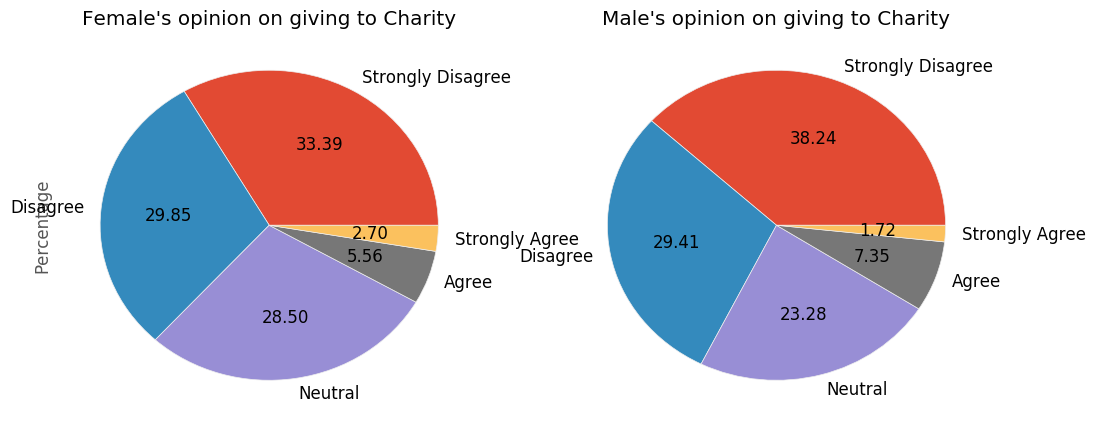

In [69]:
plt.subplot(1,2,1)
f_study['Charity'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on giving to Charity')
plt.subplot(1,2,2)
m_study['Charity'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on giving to Charity')
plt.show()

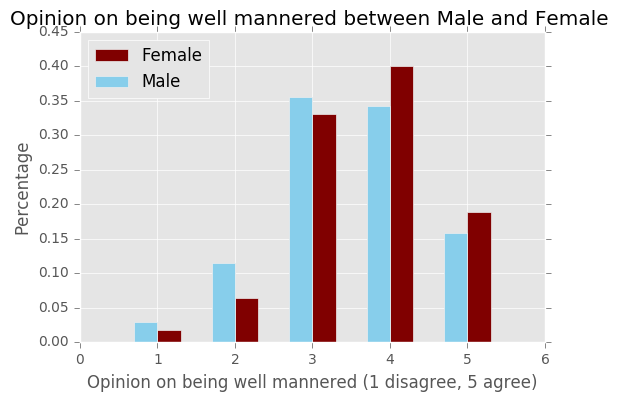

In [70]:
plt.bar(bar_locations, f_study['Appearence and gestures'], bar_width, color = 'maroon', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Appearence and gestures'], bar_width, color='skyblue', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper left')
plt.xlabel('Opinion on being well mannered (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on being well mannered between Male and Female ')
plt.show()

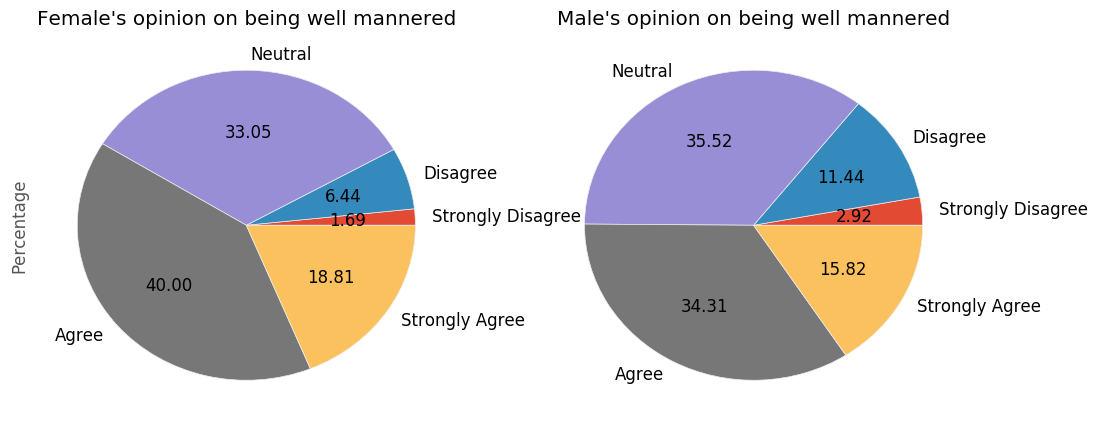

In [71]:
plt.subplot(1,2,1)
f_study['Appearence and gestures'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on being well mannered')
plt.subplot(1,2,2)
m_study['Appearence and gestures'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on being well mannered')
plt.show()

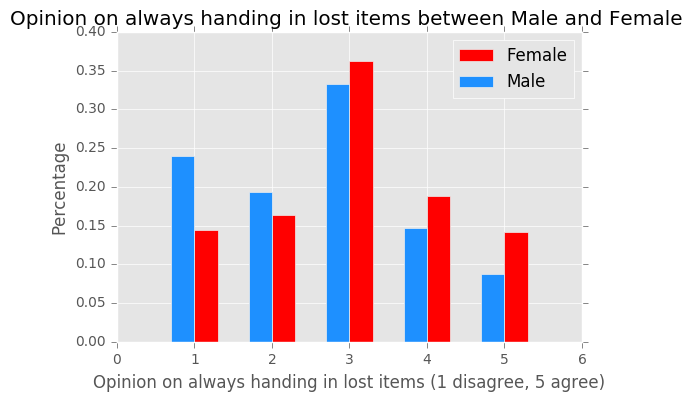

In [72]:
plt.bar(bar_locations, f_study['Finding lost valuables'], bar_width, color = 'r', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Finding lost valuables'], bar_width, color='dodgerblue', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper right')
plt.xlabel('Opinion on always handing in lost items (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on always handing in lost items between Male and Female ')
plt.show()

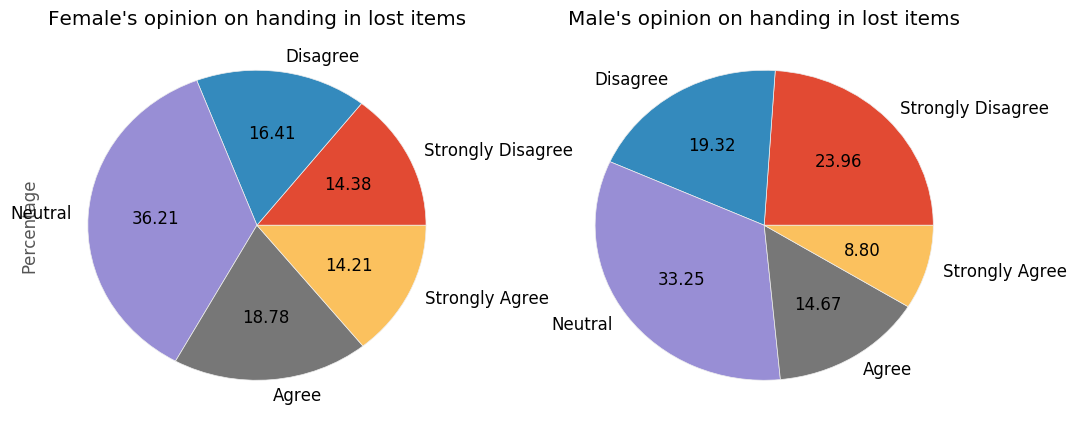

In [73]:
plt.subplot(1,2,1)
f_study['Finding lost valuables'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on handing in lost items')
plt.subplot(1,2,2)
m_study['Finding lost valuables'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on handing in lost items')
plt.show()

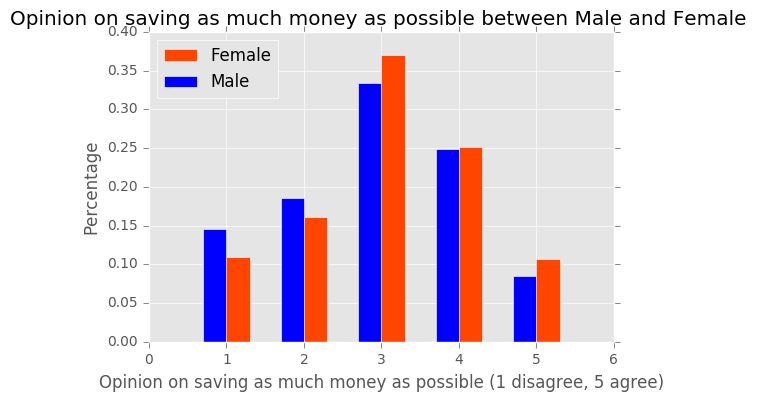

In [74]:
plt.bar(bar_locations, f_study['Finances'], bar_width, color = 'orangered', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Finances'], bar_width, color='b', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper left')
plt.xlabel('Opinion on saving as much money as possible (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on saving as much money as possible between Male and Female ')
plt.show()

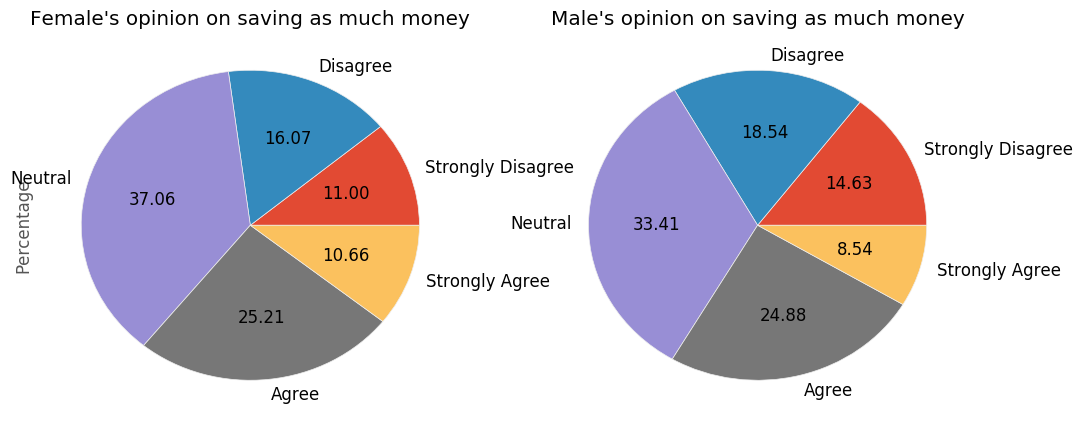

In [75]:
plt.subplot(1,2,1)
f_study['Finances'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on saving as much money')
plt.subplot(1,2,2)
m_study['Finances'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on saving as much money')
plt.show()

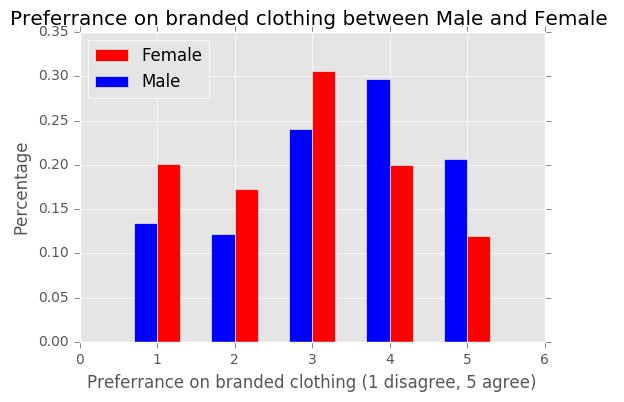

In [76]:
plt.bar(bar_locations, f_study['Branded clothing'], bar_width, color = 'r', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Branded clothing'], bar_width, color='b', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper left')
plt.xlabel('Preferrance on branded clothing (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Preferrance on branded clothing between Male and Female ')
plt.show()

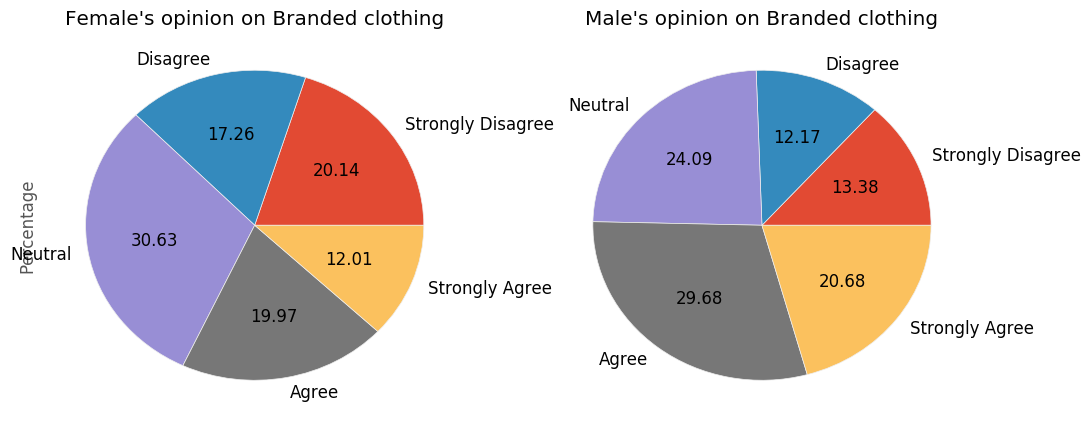

In [77]:
plt.subplot(1,2,1)
f_study['Branded clothing'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on Branded clothing')
plt.subplot(1,2,2)
m_study['Branded clothing'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on Branded clothing')
plt.show()

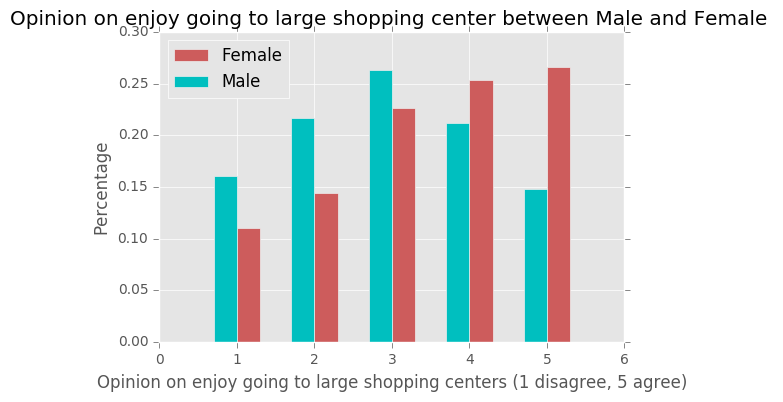

In [78]:
plt.bar(bar_locations, f_study['Shopping centres'], bar_width, color = 'indianred', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Shopping centres'], bar_width, color='c', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper left')
plt.xlabel('Opinion on enjoy going to large shopping centers (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on enjoy going to large shopping center between Male and Female ')
plt.show()

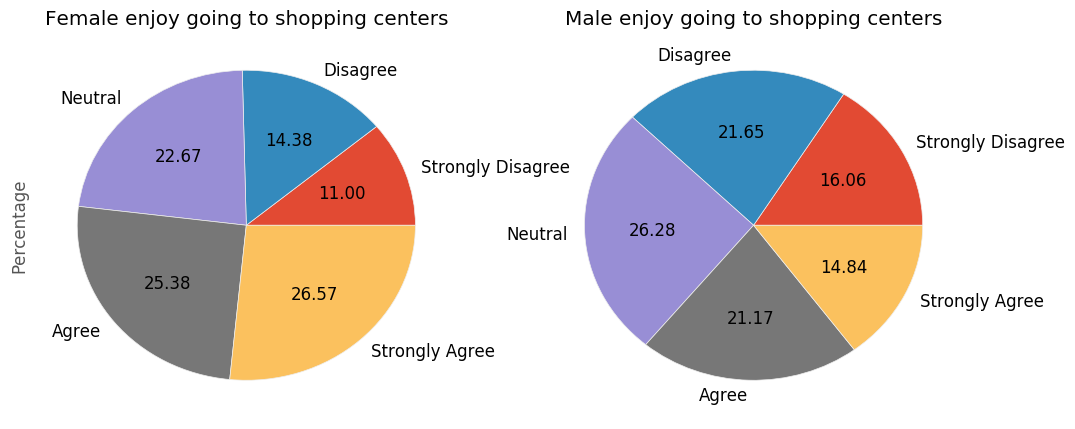

In [79]:
plt.subplot(1,2,1)
f_study['Shopping centres'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female enjoy going to shopping centers')
plt.subplot(1,2,2)
m_study['Shopping centres'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male enjoy going to shopping centers')
plt.show()

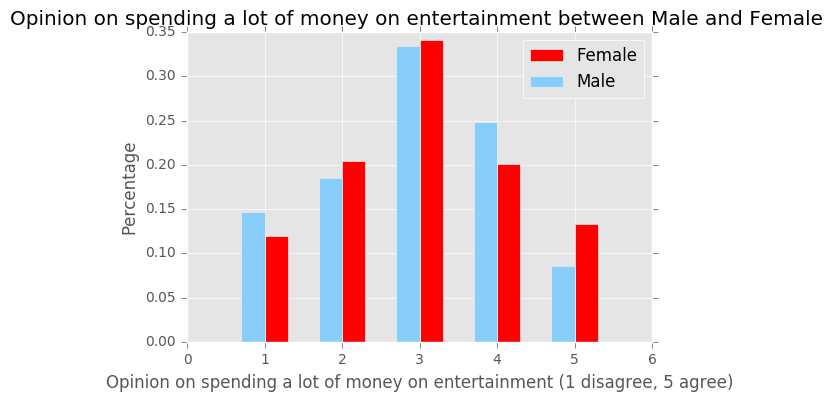

In [80]:
plt.bar(bar_locations, f_study['Entertainment spending'], bar_width, color = 'red', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Finances'], bar_width, color='lightskyblue', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper right')
plt.xlabel('Opinion on spending a lot of money on entertainment (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on spending a lot of money on entertainment between Male and Female ')
plt.show()

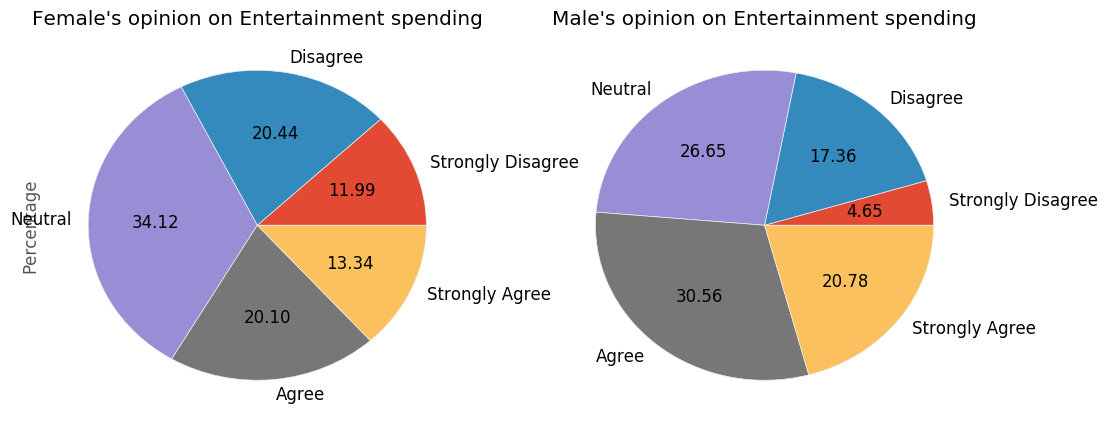

In [81]:
plt.subplot(1,2,1)
f_study['Entertainment spending'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on Entertainment spending')
plt.subplot(1,2,2)
m_study['Entertainment spending'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on Entertainment spending')
plt.show()

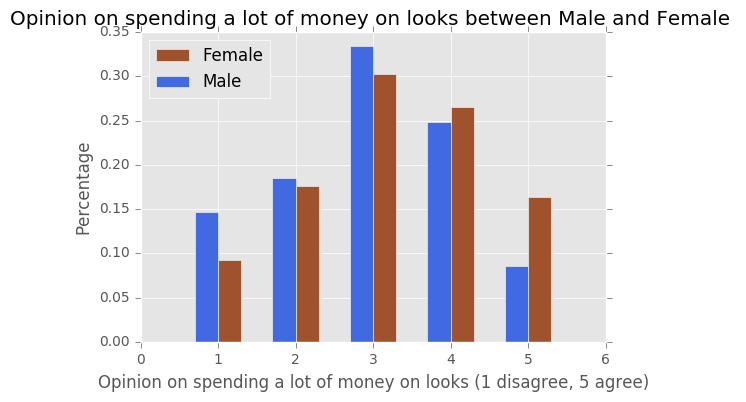

In [82]:
plt.bar(bar_locations, f_study['Spending on looks'], bar_width, color = 'sienna', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Finances'], bar_width, color='royalblue', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper left')
plt.xlabel('Opinion on spending a lot of money on looks (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on spending a lot of money on looks between Male and Female ')
plt.show()

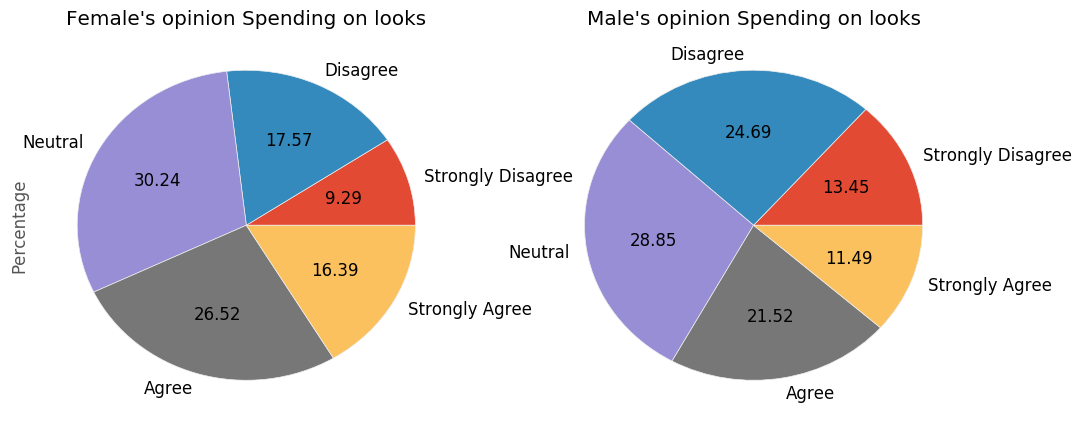

In [83]:
plt.subplot(1,2,1)
f_study['Spending on looks'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion Spending on looks')
plt.subplot(1,2,2)
m_study['Spending on looks'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion Spending on looks')
plt.show()

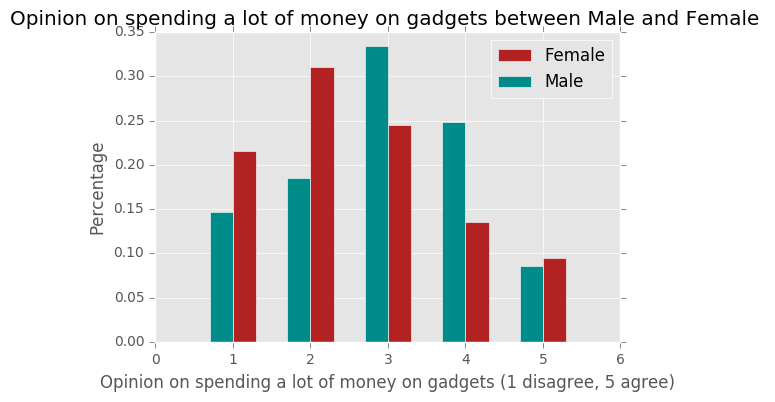

In [84]:
plt.bar(bar_locations, f_study['Spending on gadgets'], bar_width, color = 'firebrick', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Finances'], bar_width, color='darkcyan', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper right')
plt.xlabel('Opinion on spending a lot of money on gadgets (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on spending a lot of money on gadgets between Male and Female ')
plt.show()

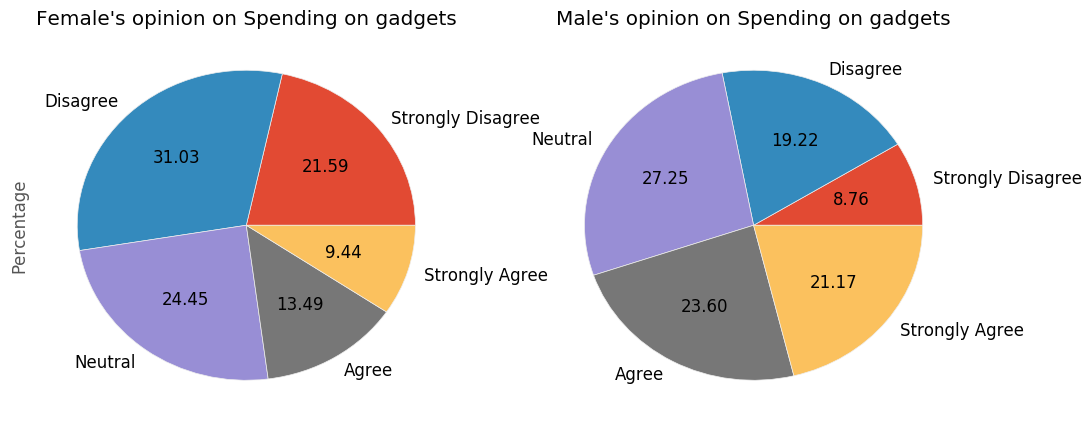

In [85]:
plt.subplot(1,2,1)
f_study['Spending on gadgets'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on Spending on gadgets')
plt.subplot(1,2,2)
m_study['Spending on gadgets'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on Spending on gadgets')
plt.show()

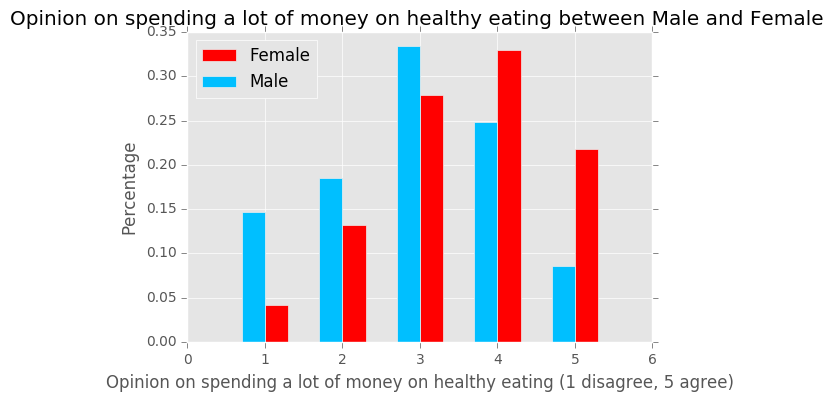

In [86]:
plt.bar(bar_locations, f_study['Spending on healthy eating'], bar_width, color = 'red', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Finances'], bar_width, color='deepskyblue', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper left')
plt.xlabel('Opinion on spending a lot of money on healthy eating (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on spending a lot of money on healthy eating between Male and Female ')
plt.show()

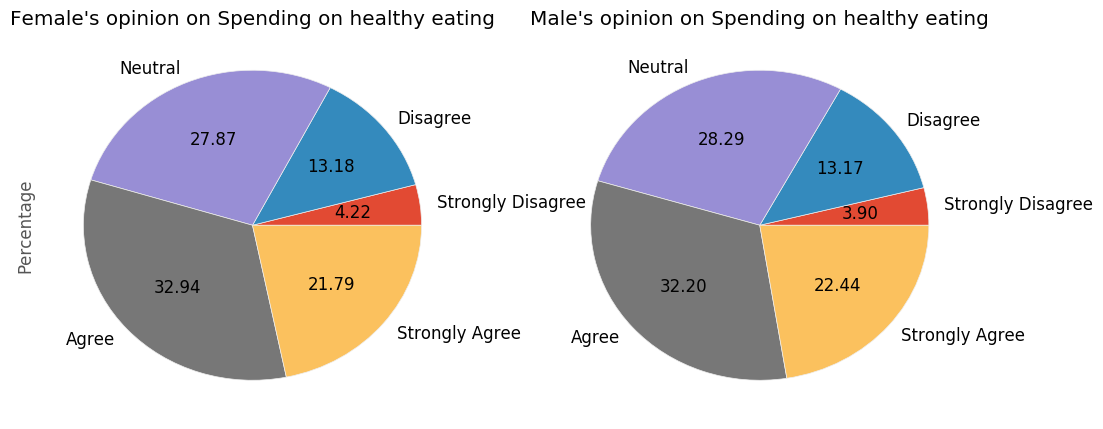

In [87]:
plt.subplot(1,2,1)
f_study['Spending on healthy eating'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on Spending on healthy eating')
plt.subplot(1,2,2)
m_study['Spending on healthy eating'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on Spending on healthy eating')
plt.show()

In [88]:
y_data['Village - town'].value_counts()

city       707
village    299
Name: Village - town, dtype: int64

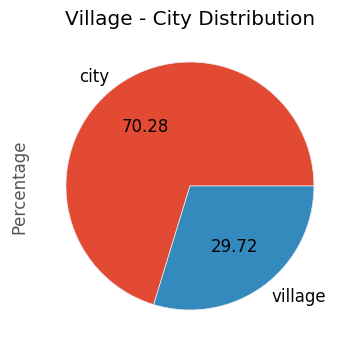

In [89]:
y_data['Village - town'].value_counts().plot.pie(labels = ['city','village'], autopct = '%.2f', fontsize = 12, figsize = (4,4))
plt.ylabel('Percentage')
plt.title('Village - City Distribution')
plt.show()

In [90]:
v_data = y_data[y_data['Village - town'] == 'village'][['Internet usage', 'Shopping centres', 'Theatre','Education', 'Spending on gadgets', 'Spending on looks', 'Branded clothing']]
v_data = v_data.reset_index(drop = True)

In [91]:
c_data = y_data[y_data['Village - town'] == 'city'][['Internet usage', 'Shopping centres', 'Theatre','Education', 'Spending on gadgets', 'Spending on looks', 'Branded clothing']]
c_data = c_data.reset_index(drop = True)

In [92]:
c_data.head()

,Internet usage,Shopping centres,Theatre,Education,Spending on gadgets,Spending on looks,Branded clothing
0,few hours a day,4.0,2.0,college/bachelor degree,5,2.0,1.0
1,few hours a day,4.0,5.0,secondary school,4,3.0,1.0
2,most of the day,4.0,1.0,college/bachelor degree,4,4.0,3.0
3,few hours a day,3.0,1.0,secondary school,4,1.0,3.0
4,few hours a day,4.0,2.0,college/bachelor degree,3,4.0,4.0


In [93]:
bar_width = 0.4
bar_locations = np.array([2,1,3,4])

In [94]:
c_len = len(c_data['Internet usage'])
v_len = len(v_data['Internet usage'])

In [95]:
v_int = v_data['Internet usage'].value_counts()/float(v_len)
c_int = c_data['Internet usage'].value_counts()/float(c_len)

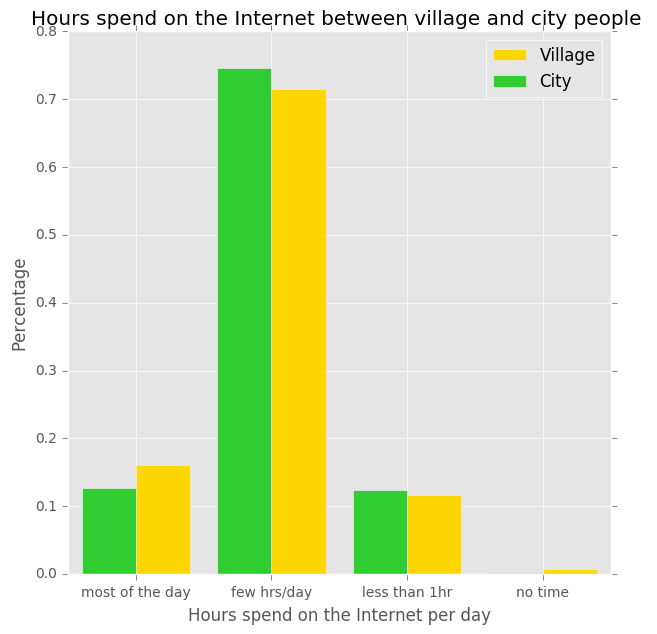

In [96]:
hr_int = ['few hrs/day', 'most of the day', 'less than 1hr', 'no time']
plt.figure(figsize=(7,7))
plt.bar(bar_locations, v_int, bar_width, color = 'gold')
plt.bar(bar_locations - bar_width, c_int, bar_width, color='limegreen')
plt.xticks(bar_locations, hr_int)
plt.legend(["Village", "City"], loc = 'upper right')
plt.xlabel('Hours spend on the Internet per day')
plt.ylabel('Percentage')
plt.title('Hours spend on the Internet between village and city people ')
plt.show()

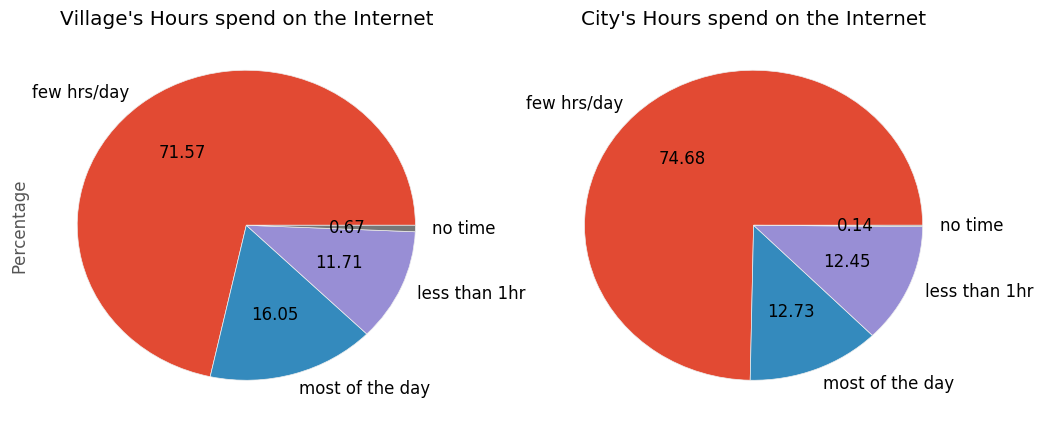

In [97]:
plt.subplot(1,2,1)
v_int.plot.pie(labels = hr_int, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Village\'s Hours spend on the Internet')
plt.subplot(1,2,2)
c_int.plot.pie(labels = hr_int, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('City\'s Hours spend on the Internet')
plt.show()

In [98]:
bar_width = 0.4
bar_locations = np.array([4,3,2,5,6,1])

In [99]:
v_edu = v_data['Education'].value_counts()/float(len(v_data['Education']))
c_edu = c_data['Education'].value_counts()/float(len(c_data['Education']))
edu_lv = ['Secondary', 'Bachelor','Master','Primary','Pupil','PhD']

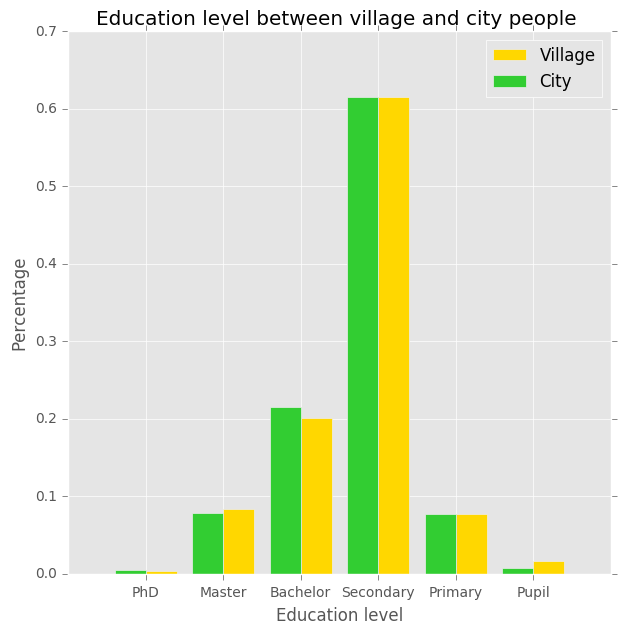

In [100]:
plt.figure(figsize=(7,7))
plt.bar(bar_locations, v_edu, bar_width, color = 'gold')
plt.bar(bar_locations - bar_width, c_edu, bar_width, color='limegreen')
plt.xticks(bar_locations, edu_lv)
plt.legend(["Village", "City"], loc = 'upper right')
plt.xlabel('Education level')
plt.ylabel('Percentage')
plt.title('Education level between village and city people ')
plt.show()

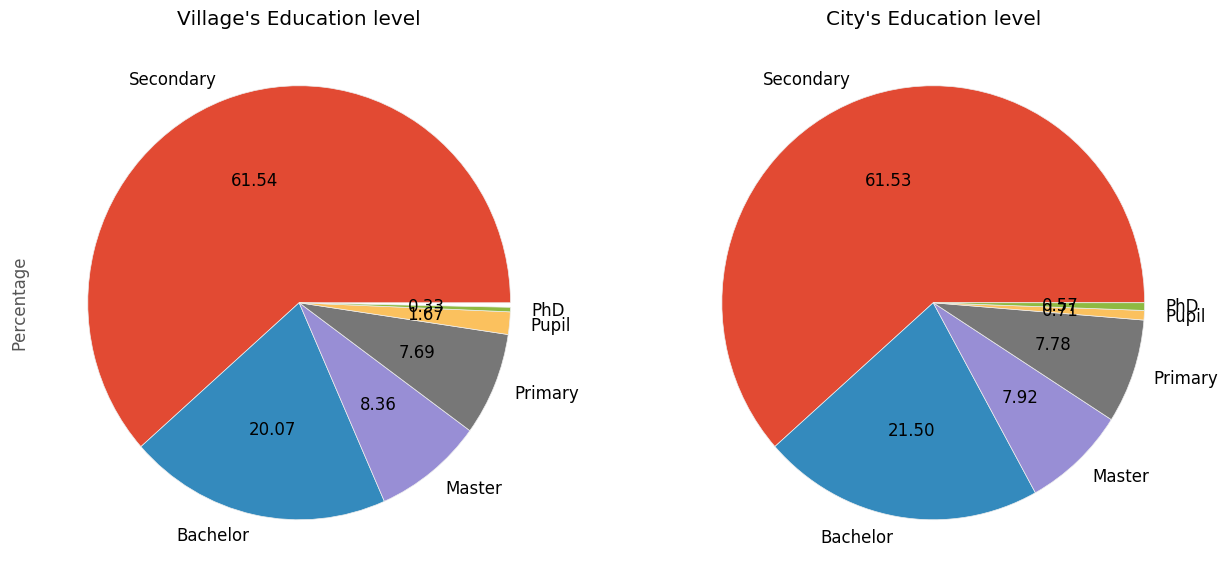

In [101]:
plt.subplot(1,2,1)
v_edu.plot.pie(labels = edu_lv, autopct = '%.2f', fontsize = 12, figsize = (15,7))
plt.ylabel('Percentage')
plt.title('Village\'s Education level')
plt.subplot(1,2,2)
c_edu.plot.pie(labels = edu_lv, autopct = '%.2f', fontsize = 12, figsize = (15,7))
plt.ylabel('')
plt.title('City\'s Education level')
plt.show()

In [102]:
vc_col = list(v_data)
vc_col = vc_col[1:3] + vc_col[4:]
c_study = pd.DataFrame(0, index = xrange(1,6), columns = vc_col)
v_study = pd.DataFrame(0, index = xrange(1,6), columns = vc_col)

In [103]:
vc_col

['Shopping centres',
 'Theatre',
 'Spending on gadgets',
 'Spending on looks',
 'Branded clothing']

In [104]:
for index, row in v_data.iterrows():
    for y in vc_col:
        try:
            v_study.loc[row[y],y] += 1
        except:
            continue


In [105]:
for index, row in c_data.iterrows():
    for y in vc_col:
        try:
            c_study.loc[row[y],y] += 1
        except:
            continue

In [106]:
v_total = v_study.sum(axis=0)
c_total = c_study.sum(axis=0)

In [107]:
[gender_study(v_study, v_total, x,y) for x in xrange(1,6) for y in vc_col]
v_study

,Shopping centres,Theatre,Spending on gadgets,Spending on looks,Branded clothing
1,0.124161,0.154362,0.217391,0.137124,0.214765
2,0.154362,0.221477,0.274247,0.234114,0.147651
3,0.244966,0.251678,0.230769,0.297659,0.295302
4,0.258389,0.208054,0.137124,0.214047,0.184564
5,0.218121,0.164430,0.140468,0.117057,0.157718


In [108]:
[gender_study(c_study, c_total, x,y) for x in xrange(1,6) for y in vc_col]
c_study

,Shopping centres,Theatre,Spending on gadgets,Spending on looks,Branded clothing
1,0.131542,0.161429,0.142857,0.099432,0.155807
2,0.183876,0.200000,0.257426,0.191761,0.154391
3,0.240453,0.264286,0.263083,0.295455,0.276204
4,0.227723,0.187143,0.192362,0.259943,0.257790
5,0.216407,0.187143,0.144272,0.153409,0.155807


In [109]:
bar_width = 0.3
bar_locations = np.arange(1,6)

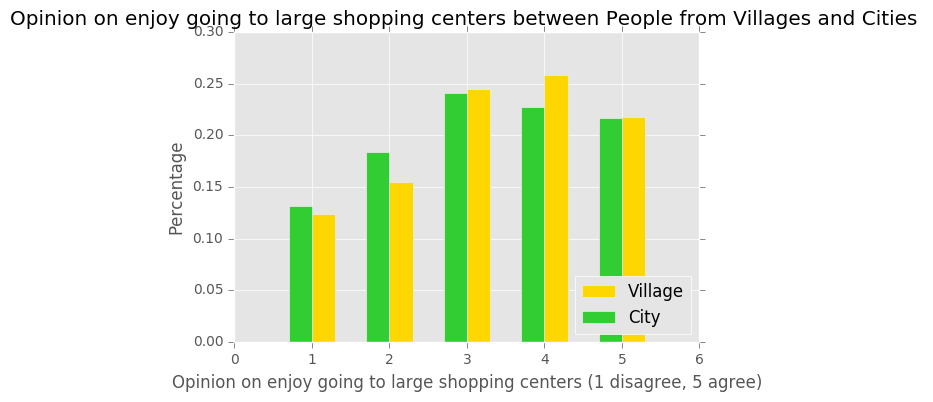

In [110]:
plt.bar(bar_locations, v_study['Shopping centres'], bar_width, color = 'gold')
plt.bar(bar_locations - bar_width, c_study['Shopping centres'], bar_width, color='limegreen')
plt.legend(["Village", "City"], loc = 'lower right')
plt.xlabel('Opinion on enjoy going to large shopping centers (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on enjoy going to large shopping centers between People from Villages and Cities ')
plt.show()

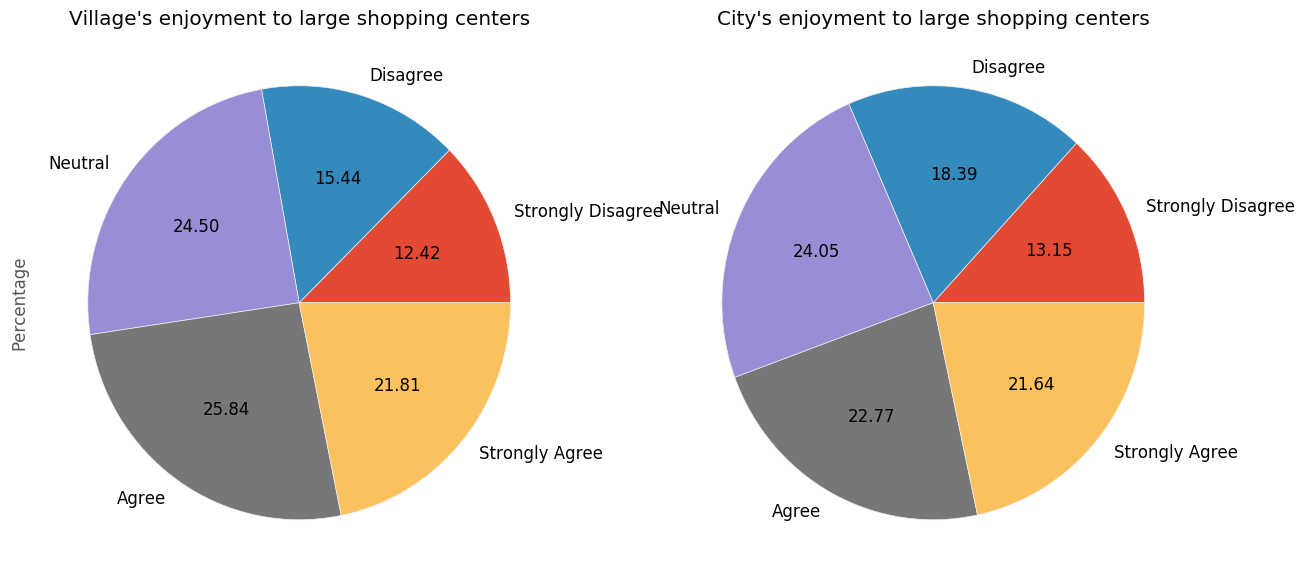

In [111]:
plt.subplot(1,2,1)
v_study['Shopping centres'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (15,7))
plt.ylabel('Percentage')
plt.title('Village\'s enjoyment to large shopping centers')
plt.subplot(1,2,2)
c_study['Shopping centres'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (15,7))
plt.ylabel('')
plt.title('City\'s enjoyment to large shopping centers')
plt.show()

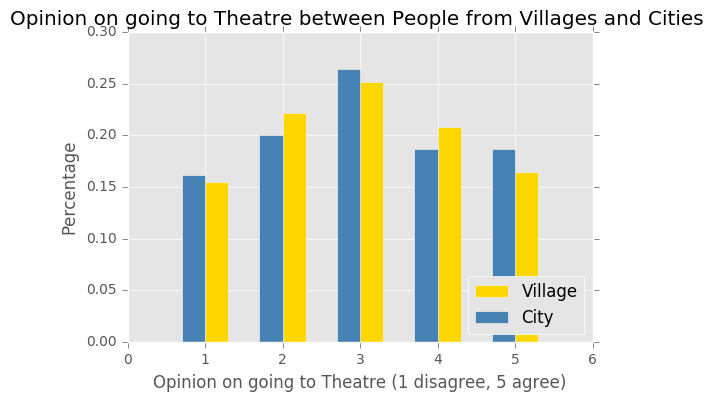

In [112]:
plt.bar(bar_locations, v_study['Theatre'], bar_width, color = 'gold')
plt.bar(bar_locations - bar_width, c_study['Theatre'], bar_width, color='steelblue')
plt.legend(["Village", "City"], loc = 'lower right')
plt.xlabel('Opinion on going to Theatre (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on going to Theatre between People from Villages and Cities ')
plt.show()

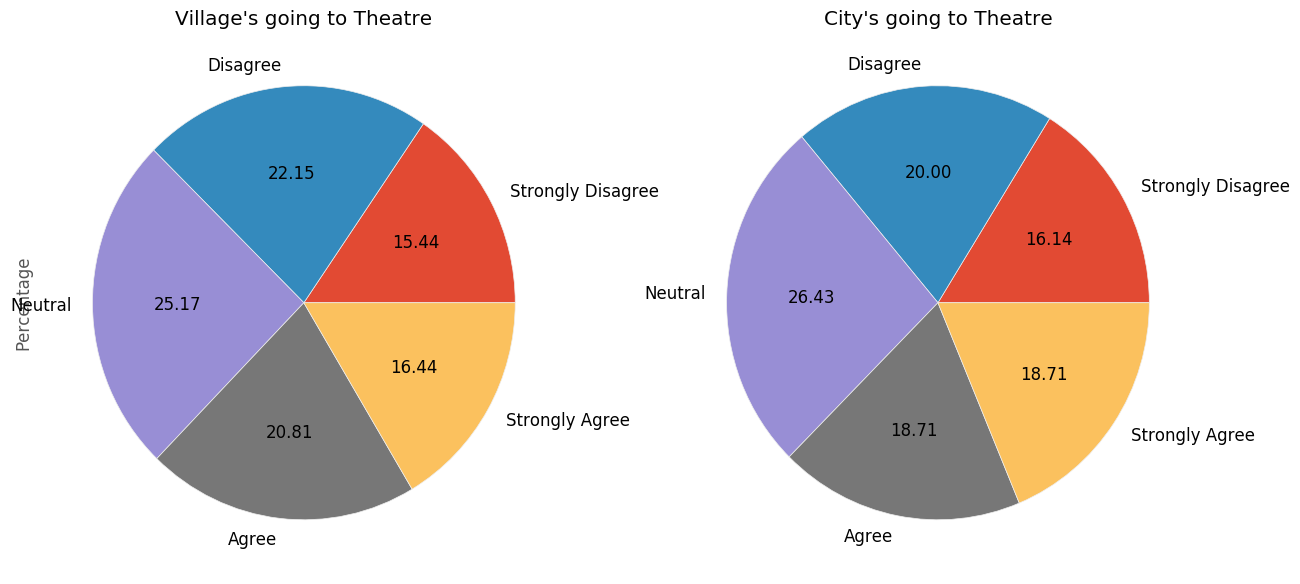

In [113]:
plt.subplot(1,2,1)
v_study['Theatre'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (15,7))
plt.ylabel('Percentage')
plt.title('Village\'s going to Theatre')
plt.subplot(1,2,2)
c_study['Theatre'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (15,7))
plt.ylabel('')
plt.title('City\'s going to Theatre')
plt.show()

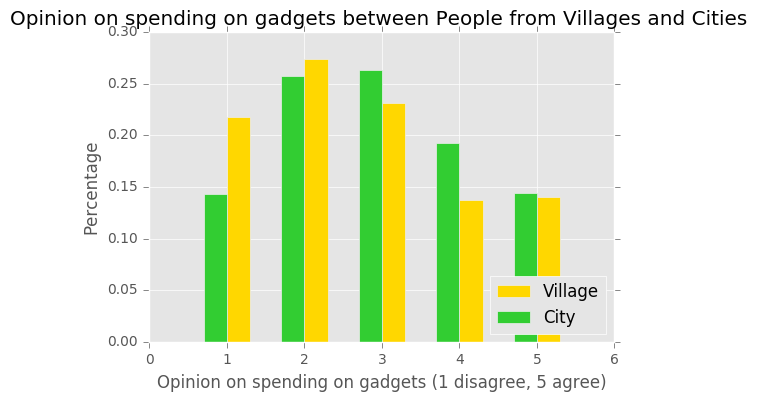

In [114]:
plt.bar(bar_locations, v_study['Spending on gadgets'], bar_width, color = 'gold')
plt.bar(bar_locations - bar_width, c_study['Spending on gadgets'], bar_width, color='limegreen')
plt.legend(["Village", "City"], loc = 'lower right')
plt.xlabel('Opinion on spending on gadgets (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on spending on gadgets between People from Villages and Cities ')
plt.show()

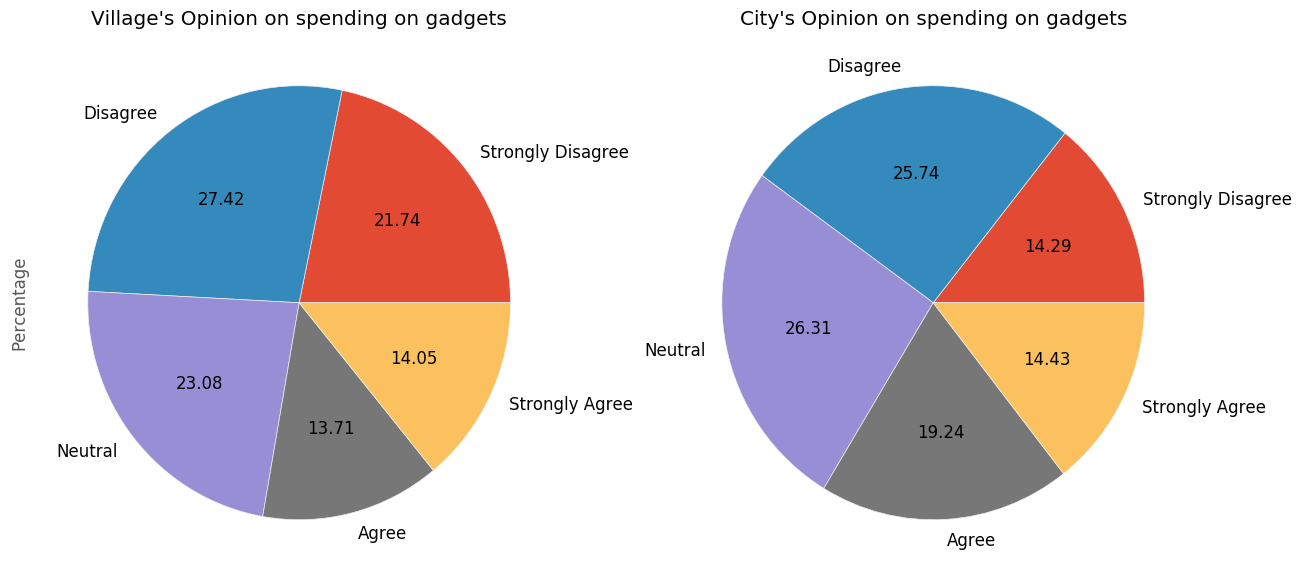

In [115]:
plt.subplot(1,2,1)
v_study['Spending on gadgets'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (15,7))
plt.ylabel('Percentage')
plt.title('Village\'s Opinion on spending on gadgets')
plt.subplot(1,2,2)
c_study['Spending on gadgets'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (15,7))
plt.ylabel('')
plt.title('City\'s Opinion on spending on gadgets')
plt.show()

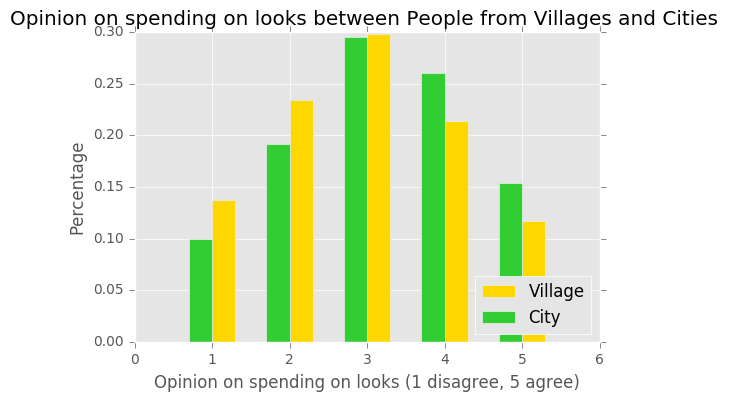

In [116]:
plt.bar(bar_locations, v_study['Spending on looks'], bar_width, color = 'gold')
plt.bar(bar_locations - bar_width, c_study['Spending on looks'], bar_width, color='limegreen')
plt.legend(["Village", "City"], loc = 'lower right')
plt.xlabel('Opinion on spending on looks (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on spending on looks between People from Villages and Cities ')
plt.show()

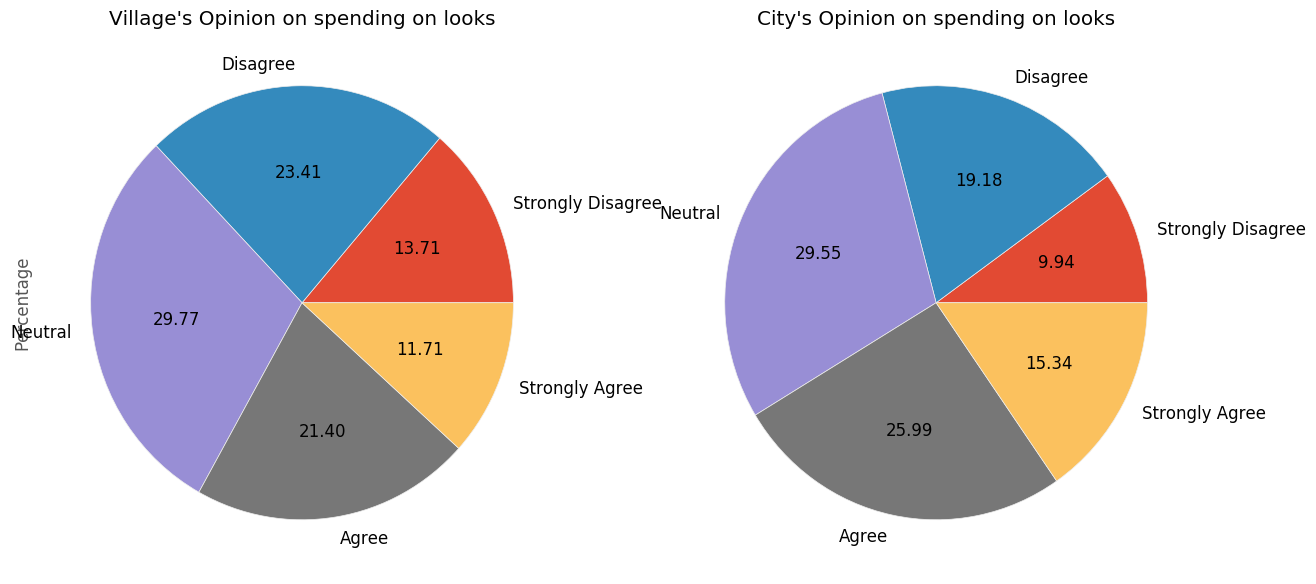

In [117]:
plt.subplot(1,2,1)
v_study['Spending on looks'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (15,7))
plt.ylabel('Percentage')
plt.title('Village\'s Opinion on spending on looks')
plt.subplot(1,2,2)
c_study['Spending on looks'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (15,7))
plt.ylabel('')
plt.title('City\'s Opinion on spending on looks')
plt.show()

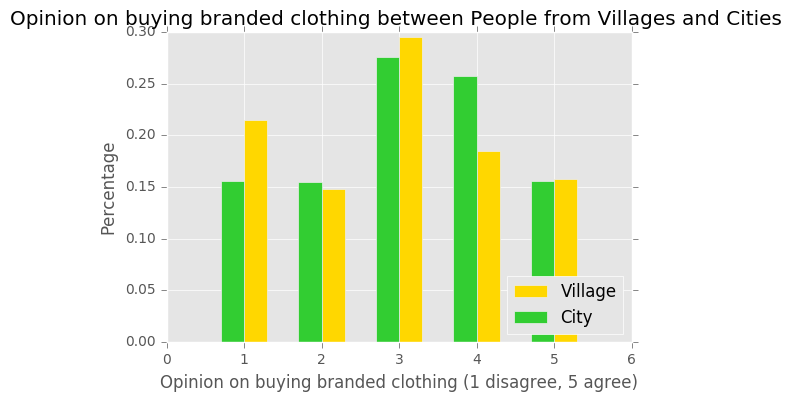

In [118]:
plt.bar(bar_locations, v_study['Branded clothing'], bar_width, color = 'gold')
plt.bar(bar_locations - bar_width, c_study['Branded clothing'], bar_width, color='limegreen')
plt.legend(["Village", "City"], loc = 'lower right')
plt.xlabel('Opinion on buying branded clothing (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on buying branded clothing between People from Villages and Cities ')
plt.show()

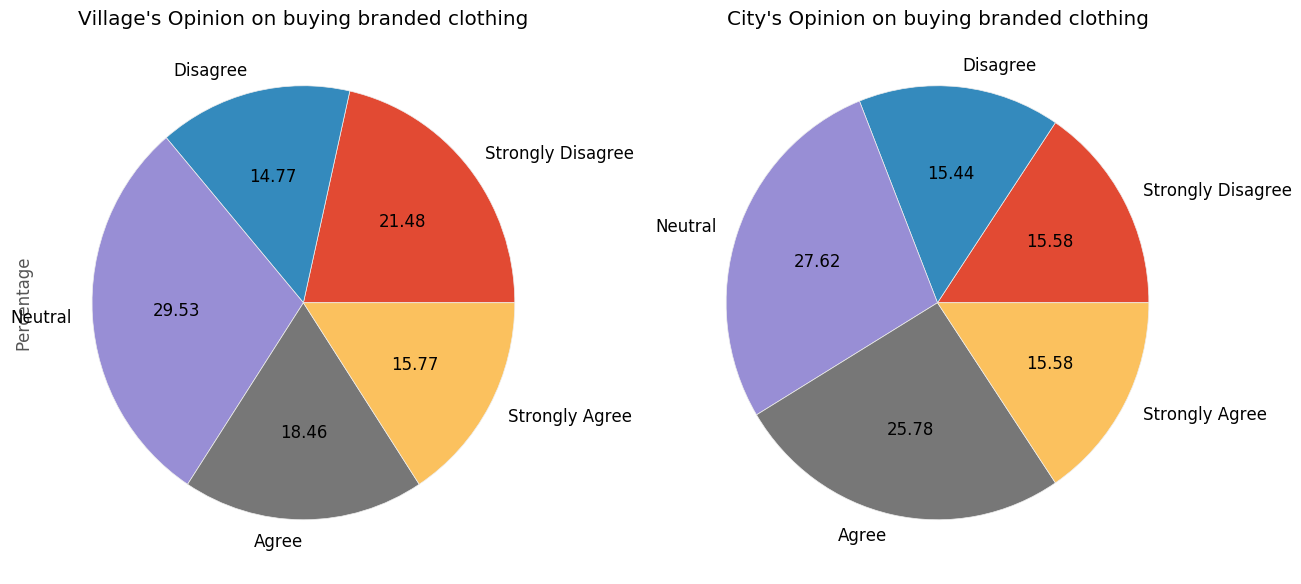

In [119]:
plt.subplot(1,2,1)
v_study['Branded clothing'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (15,7))
plt.ylabel('Percentage')
plt.title('Village\'s Opinion on buying branded clothing')
plt.subplot(1,2,2)
c_study['Branded clothing'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (15,7))
plt.ylabel('')
plt.title('City\'s Opinion on buying branded clothing')
plt.show()